In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importação do Pandas
import pandas as pd

resenha = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [0]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [4]:
print("Positivo \n")
print(resenha.text_pt[4902])

Positivo 

Eu temo que eu fiquei só para assistir a primeira hora deste filme, pois realmente me pareceu um lixo irracional e um desperdício de talento. Liv Tyler interpreta uma beleza sumptuosa, mas as suas habilidades de atuação ainda não estão suficientemente desenvolvidas para dar um real pontapé ao papel. Como ela lentamente seduz um barman em uma vida de crime, é difícil sentir qualquer preocupação real sobre qualquer um dos personagens. Até mesmo John Goodman apresenta suas linhas fracamente cômicas com uma ausência de brio, como se o humor sem graça devesse ser recitado lentamente, no caso de alguém perder a piada. O final é suposto ser bom, mas o curso inicial e principal deixou-me sem apetite para descobrir.


In [5]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [7]:
classificacao = resenha ["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [8]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [9]:
#Vetorização
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer (lowercase=False)

bag_of_words =vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
#Vocabuláário
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [11]:

vetorizado = pd.SparseDataFrame(
    bag_of_words,
    columns = vetorizar.get_feature_names()
)
vetorizado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/sparse/frame.py:257: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_index=BlockIndex(N, blocs, blens),
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pa

,Assisti,filme,ruim,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


In [12]:
#Classificando sentimentos
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])
print(bag_of_words.shape)

(49459, 50)


In [0]:
from sklearn.model_selection import train_test_split


treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha["classificacao"],
                                                              random_state = 42)

In [14]:
print(treino.shape)
print(teste.shape)

(37094, 50)
(12365, 50)


In [15]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
previsao_teste = regressao_logistica.predict_proba(teste)
print(previsao_teste)

[[0.25696739 0.74303261]
 [0.72224991 0.27775009]
 [0.70076066 0.29923934]
 ...
 [0.46019618 0.53980382]
 [0.46166722 0.53833278]
 [0.61777927 0.38222073]]


In [16]:
previsao_teste_bol = previsao_teste[:,1] >= 0.5
print(previsao_teste_bol)

[ True False False ...  True  True False]


In [17]:
import numpy as np

previsao_teste_int = previsao_teste_bol.astype(np.int)
print(previsao_teste_int)

[1 0 0 ... 1 1 0]


In [18]:
from sklearn.metrics import accuracy_score

acuracia_teste = accuracy_score(classe_teste, previsao_teste_int)
print(acuracia_teste)

0.6583097452486858


In [0]:
from sklearn.linear_model import LogisticRegression

In [20]:
#Bag of Words
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer (lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)

  regressao_logistica = LogisticRegression(solver='lbfgs')
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [0]:
#WordCloud
%matplotlib inline
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110,
                           collocations = False).generate(todas_palavras)

In [22]:
nuvem_palavras #Saída - objeto

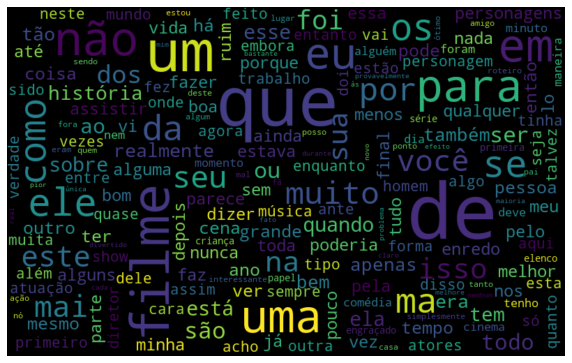

In [23]:
#Gerando uma imagem e tratando os dados
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#Busca de resenha positiva na coluna Sentiment
resenha.query("sentiment =='pos'")


,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [0]:
#Definindo variáável de palavas negativas
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment =='neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [0]:
#Definindo variáável de palavas positivas
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment =='pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

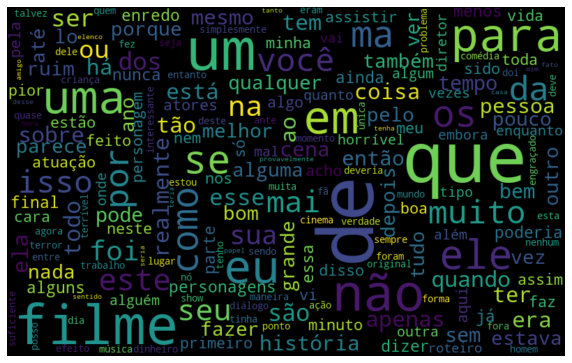

In [27]:
nuvem_palavras_neg(resenha, "text_pt")

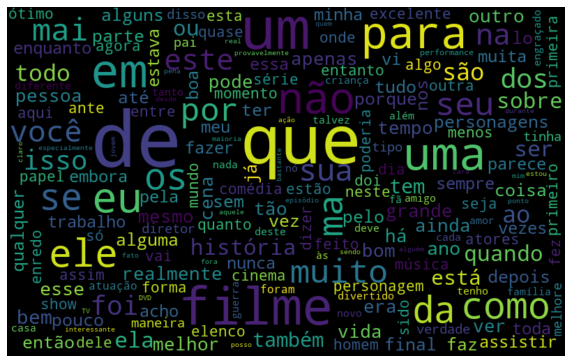

In [28]:
nuvem_palavras_pos(resenha, "text_pt")

In [29]:
#Frequêência das palavras com a Bibilioteca NLTK
import nltk
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [30]:
#Separação por espaço em branco (frase)
from nltk import tokenize
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [0]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [32]:
#Ordenando as 10 primeiras colunas
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


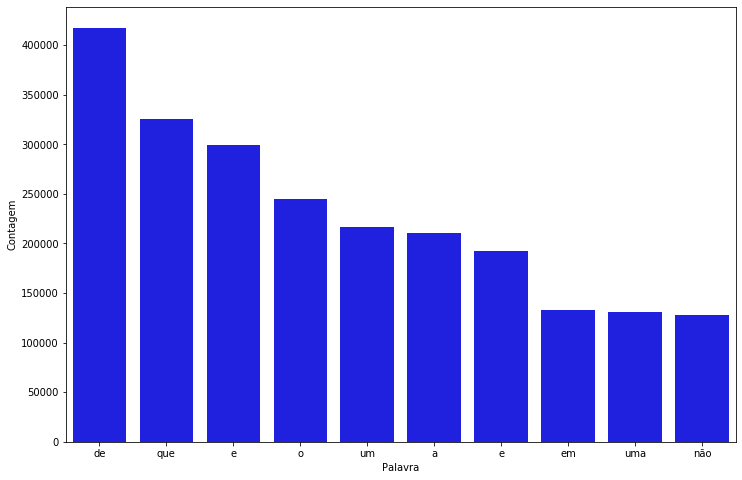

In [33]:
#Criando visualzação

import seaborn as sns
    
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'blue')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(resenha, "text_pt", 10)

In [34]:

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
#Removendo palavras que não agregam
#Stop Words
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [36]:
#Tratamento sem as palavras irrelevantes
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [37]:
classificar_texto(resenha, "tratamento_1", "classificacao") #0-100%

0.6607359482410028

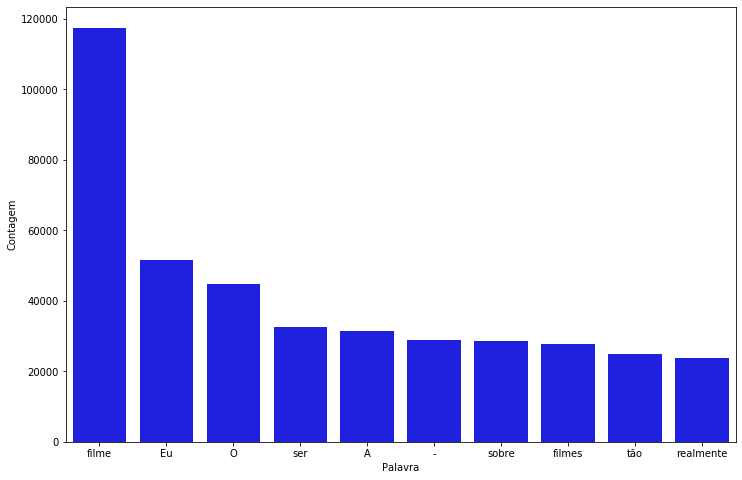

In [38]:
pareto(resenha, "tratamento_1", 10)

In [39]:
#Otimização de análise - separação de pontuação das palavras
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [0]:
#Removendo pontuação do dataset
from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha['tratamento_1']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [41]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [42]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [43]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

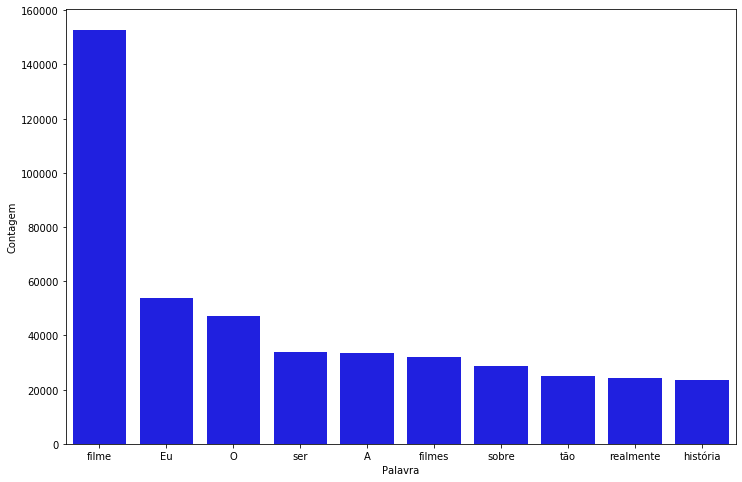

In [44]:
pareto(resenha, "tratamento_2", 10)

In [45]:
!pip install unidecode

In [46]:
#Removendo acentuação
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [0]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [48]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [0]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [68]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [0]:
#Medindo e comparando resltados
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [52]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [53]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6810351799433886


In [55]:
acuracia_teste

0.6583097452486858

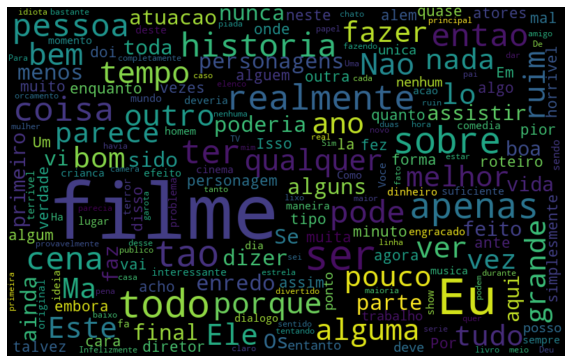

In [56]:
nuvem_palavras_neg(resenha, "tratamento_3")

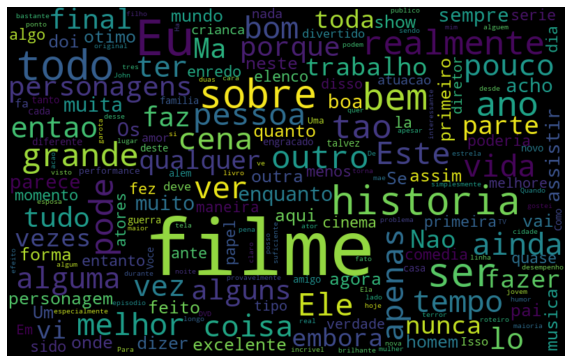

In [57]:
nuvem_palavras_pos(resenha, "tratamento_3")

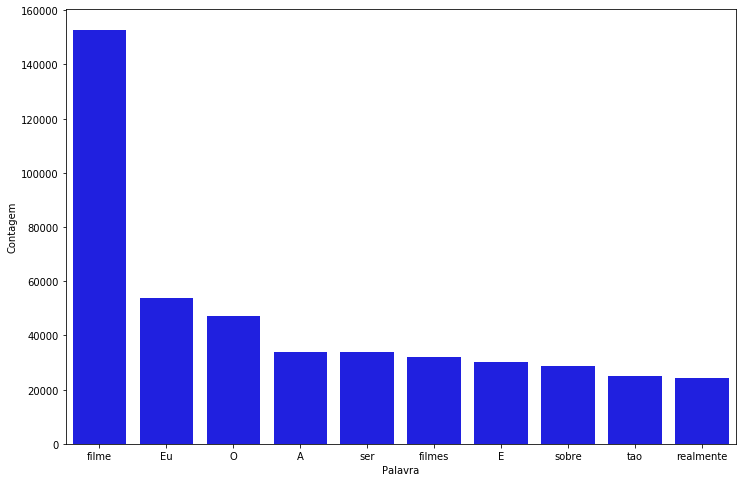

In [58]:
pareto(resenha, "tratamento_3", 10)

In [61]:
#Transformando em minúscula
frase = "O Chicão é um bom aluno"
print(frase.lower())

o chicão é um bom aluno


In [0]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [70]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [71]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [75]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


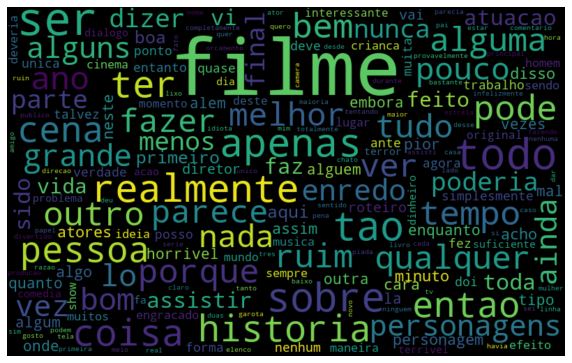

In [77]:
nuvem_palavras_neg(resenha, "tratamento_4")

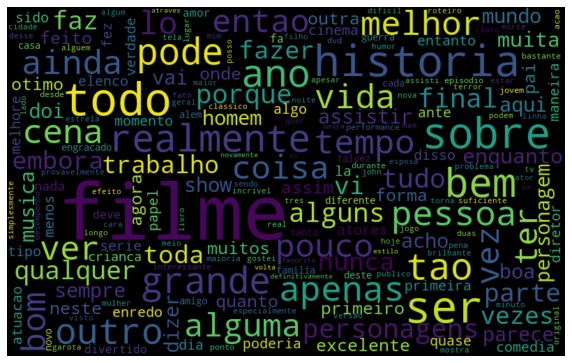

In [78]:
nuvem_palavras_pos(resenha, "tratamento_4")

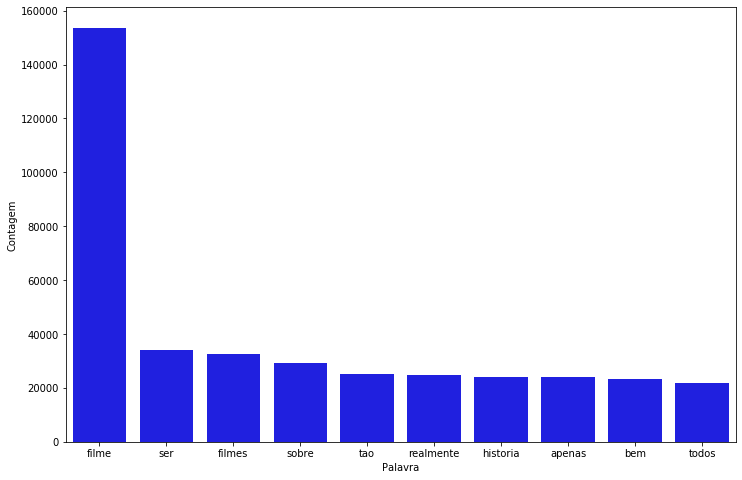

In [80]:
pareto(resenha, "tratamento_4", 10)

In [87]:
#Stemmer = reduzir as palavras ao radical comum
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

'corr'

In [0]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [94]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


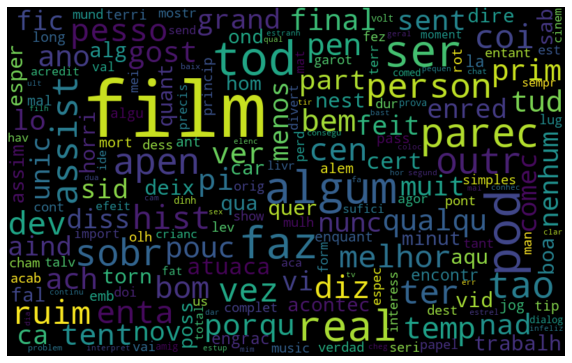

In [96]:
nuvem_palavras_neg(resenha, "tratamento_5")

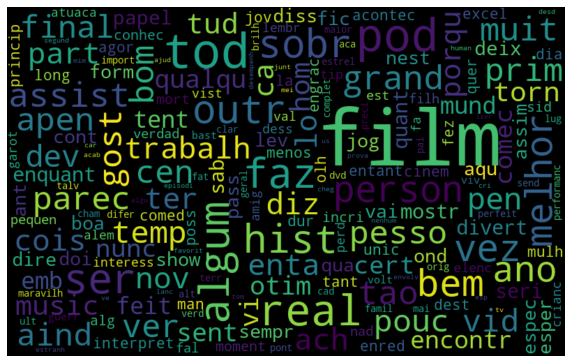

In [97]:
nuvem_palavras_pos(resenha, "tratamento_5")

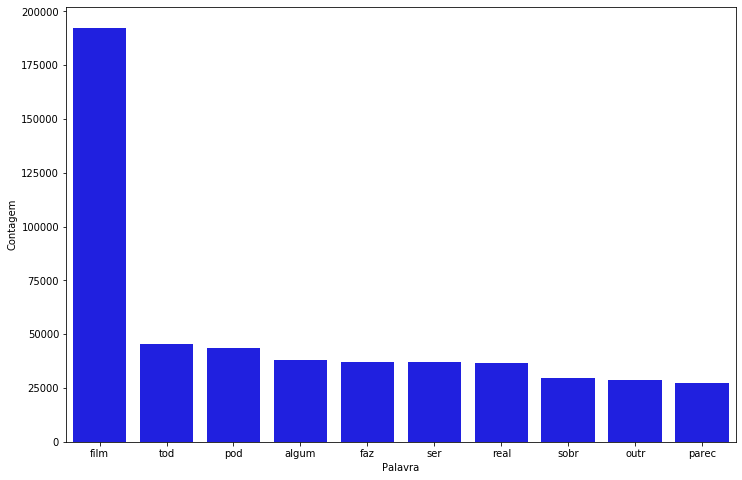

In [101]:
pareto(resenha, "tratamento_5", 10)

In [106]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assiti um filme ótimo", "Assisti um filme péssimo"]
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()

)

,Assisti,Assiti,filme,péssimo,um,ótimo
0,0.000000,0.576152,0.409937,0.000000,0.409937,0.576152
1,0.576152,0.000000,0.409937,0.576152,0.409937,0.000000


In [110]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                             resenha["classificacao"],
                                                             random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [112]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                             resenha["classificacao"],
                                                             random_state=42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6988273352203801


In [113]:
print(acuracia_tratamento5)

0.6943792964011323


In [124]:
#Ngrams = preserva memória
from nltk import ngrams

frase = "Assisti um ótimo filmr."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filmr.')]

In [130]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [131]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [140]:
pesos = pd.DataFrame(
  regressao_logistica.coef_[0].T,
  index = tfidf.get_feature_names()
)

pesos.nlargest(10,0)

,0
otim,8.290477
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579574
ador,4.422221
brilh,4.268573


In [139]:
pesos.nsmallest(10,0)

,0
pi,-9.175704
ruim,-9.169727
horri,-8.751674
terri,-7.186909
chat,-6.919291
nad,-6.029855
infeliz,-5.310519
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
